https://www.kaggle.com/datasets/sanikamal/amazon-product-beer-dataset

In [73]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/sanikamal/amazon-product-beer-dataset")

Skipping, found downloaded files in "./amazon-product-beer-dataset" (use force=True to force download)


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#EDA

In [76]:
df = pd.read_csv('/content/amazon-product-beer-dataset/amazon_product_beer.csv')

In [77]:
df.head(10)

,brewery_id,score,username,text,style,abv,brewery_name,beer_name
0,10325,1.5,stcules,My Favorite White Wine,Hefeweizen,5.0,Vecchio Birraio,Sausa Weizen
1,10325,3.0,stcules,Yum!!,English Strong Ale,6.2,Vecchio Birraio,Red Moon
2,10325,3.0,stcules,A New Favorite!,Foreign / Export Stout,6.5,Vecchio Birraio,Black Horse Black Beer
3,10325,3.0,stcules,"Bold, Flavorful, Aromatic, Delicious",German Pilsener,5.0,Vecchio Birraio,Sausa Pils
4,1075,4.0,johnmichaelsen,"Yum! Plus, Environmentally Friendly!",American Double / Imperial IPA,7.7,Caldera Brewing Company,Cauldron DIPA
5,1075,3.0,oline73,Great Taste,Herbed / Spiced Beer,4.7,Caldera Brewing Company,Caldera Ginger Beer
6,1075,3.5,Reidrover,Simply Wonderful,Herbed / Spiced Beer,4.7,Caldera Brewing Company,Caldera Ginger Beer
7,1075,3.0,alpinebryant,A Sweet Red.,Herbed / Spiced Beer,4.7,Caldera Brewing Company,Caldera Ginger Beer
8,1075,4.5,augustgarage,Charles & Charles Red Blend,Herbed / Spiced Beer,4.7,Caldera Brewing Company,Caldera Ginger Beer
9,163,3.0,fodeeoz,This Wine Made My Party!,Light Lager,3.5,Amstel Brouwerij B. V.,Amstel Light


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2846 entries, 0 to 2845
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brewery_id    2846 non-null   int64  
 1   score         2846 non-null   float64
 2   username      2846 non-null   object 
 3   text          2846 non-null   object 
 4   style         2846 non-null   object 
 5   abv           2650 non-null   float64
 6   brewery_name  2846 non-null   object 
 7   beer_name     2846 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 178.0+ KB


In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
brewery_id,2846.0,4475.856290,7218.637537,163.0,850.0,1075.0,2055.0,26990.0
score,2846.0,3.608749,0.835313,1.0,3.0,4.0,4.0,5.0
abv,2650.0,5.585223,1.550088,0.1,4.6,5.5,6.1,12.0


In [80]:
df.columns

Index(['brewery_id', 'score', 'username', 'text', 'style', 'abv',
       'brewery_name', 'beer_name'],
      dtype='object')

In [81]:
df.shape

(2846, 8)

In [82]:
df.username.value_counts()

JamesS              37
bark                26
RedDiamond          26
barleywinefiend     25
oberon              20
                    ..
kimcgolf             1
AustinBeerLvr        1
andjusticeforale     1
TechMyst             1
Beaver13             1
Name: username, Length: 1422, dtype: int64

In [83]:
df.beer_name.nunique()

441

<AxesSubplot:>

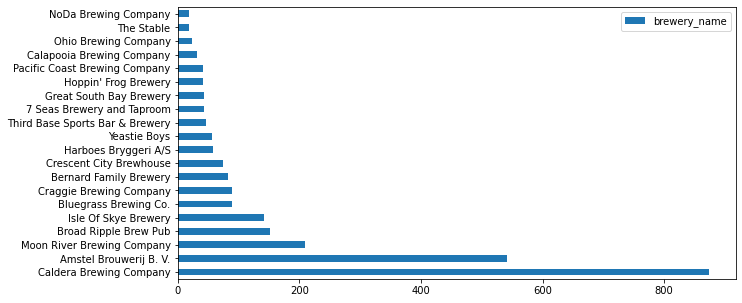

In [84]:
pd.DataFrame(df.brewery_name.value_counts()).head(20).plot(kind = 'barh', figsize = (10,5))

<AxesSubplot:>

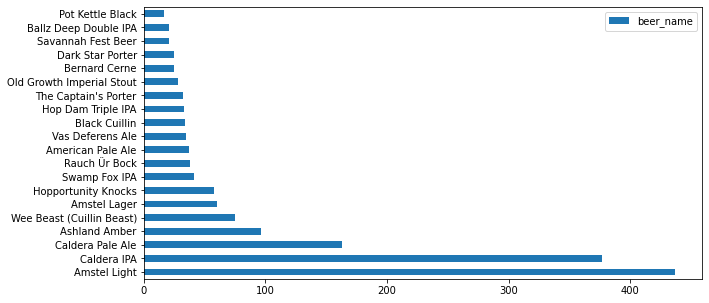

In [85]:
pd.DataFrame(df.beer_name.value_counts()).head(20).plot(kind = 'barh', figsize = (10,5))

In [86]:
top20CommentedBeer = df.beer_name.value_counts().index[:20]

In [87]:
dftop20CommentedBeer =  df.loc[df['beer_name'].map( lambda  x : True if x in top20CommentedBeer else False) ==  True ]

<AxesSubplot:ylabel='beer_name'>

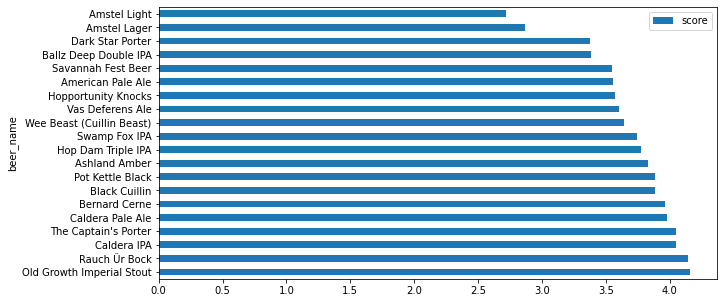

In [88]:
(dftop20CommentedBeer.groupby('beer_name')[['score']]
                      .mean().sort_values('score', ascending = False)
                      .plot(kind = 'barh', figsize = (10,5)))

In [89]:
(dftop20CommentedBeer.groupby(['brewery_name', 'beer_name'])[['abv', 'score']]
                      .mean().sort_values('score', ascending = False)
                     )

abv     score
brewery_name               beer_name                                 
Caldera Brewing Company    Old Growth Imperial Stout   8.80  4.160714
                           Rauch Ür Bock               7.40  4.144737
                           Caldera IPA                 6.10  4.053050
Moon River Brewing Company The Captain's Porter        6.00  4.046875
Caldera Brewing Company    Caldera Pale Ale            5.50  3.981595
Bernard Family Brewery     Bernard Cerne               5.00  3.960000
Isle Of Skye Brewery       Black Cuillin               4.50  3.882353
Yeastie Boys               Pot Kettle Black            6.00  3.882353
Caldera Brewing Company    Ashland Amber               5.40  3.828125
Hoppin' Frog Brewery       Hop Dam Triple IPA         10.00  3.772727
Moon River Brewing Company Swamp Fox IPA               5.80  3.743902
Isle Of Skye Brewery       Wee Beast (Cuillin Beast)   7.00  3.640000
Caldera Brewing Company    Vas Deferens Ale            8.10  3.600000
                           Hopportunity Knocks         6.80  3.568966
Bluegrass Brewing Co.      American Pale Ale           5.79  3.554054
Moon River Brewing Company Savannah Fest Beer          4.90  3.547619
7 Seas Brewery and Taproom Ballz Deep Double IPA       8.40  3.380952
Bluegrass Brewing Co.      Dark Star Porter            5.60  3.380000
Amstel Brouwerij B. V.     Amstel Lager                5.00  2.866667
                           Amstel Light                3.50  2.720824

#Preprocessing

In [90]:
df2 = df.copy()

In [91]:
styleNaList = df2.loc[df2['abv'].isnull() == True]['style'].value_counts().index

In [92]:
for style in styleNaList:
  value = df2.loc[df2['style'] == style]['abv'].mean()
  df2.loc[df2['style'] == style] = df2.loc[df2['style'] == style].fillna(value)

In [93]:
df2.isnull().sum()

brewery_id       0
score            0
username         0
text             0
style            0
abv             17
brewery_name     0
beer_name        0
dtype: int64

In [94]:
df2.loc[df2.abv.isnull() == True]

,brewery_id,score,username,text,style,abv,brewery_name,beer_name
1059,3207,4.0,bobsy,Surprising and refreshing,Weizenbock,NaN,San Francisco Brewing Company,St. Stephen's Bock
1640,1454,4.0,Brettster,really healing,English Dark Mild Ale,NaN,Broad Ripple Brew Pub,Red Bird Mild
1641,1454,4.0,tmoneyba,Mr,English Dark Mild Ale,NaN,Broad Ripple Brew Pub,Red Bird Mild
1642,1454,5.0,JamesS,Winter Necessity,English Dark Mild Ale,NaN,Broad Ripple Brew Pub,Red Bird Mild
1643,1454,3.5,BlackAngus,Great Lip Balm,English Dark Mild Ale,NaN,Broad Ripple Brew Pub,Red Bird Mild
1736,850,3.0,ChainGangGuy,love the feel on my lips,Belgian IPA,NaN,Moon River Brewing Company,Georgia Belgique
1737,850,3.5,glid02,Awesomeness In A Jar!!,Belgian IPA,NaN,Moon River Brewing Company,Georgia Belgique
2198,21841,4.5,thagr81us,Great moisturizing product,Flanders Red Ale,NaN,Craggie Brewing Company,Belgian Red With Brettanomyces Yeast
2216,21841,4.0,mikesgroove,Life long love!,Roggenbier,NaN,Craggie Brewing Company,Roggenbier
2217,21841,4.0,mduncan,I love this stuff!,Roggenbier,NaN,Craggie Brewing Company,Roggenbier


In [95]:
BreweryNaList = df2.loc[df2['abv'].isnull() == True]['brewery_name'].value_counts().index

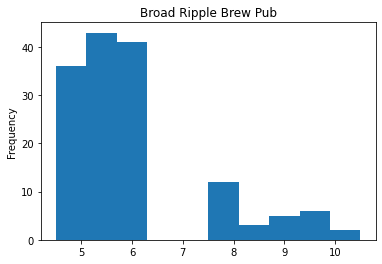

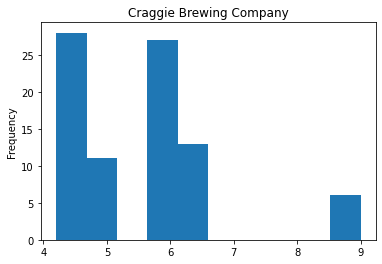

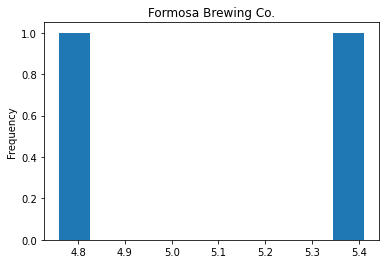

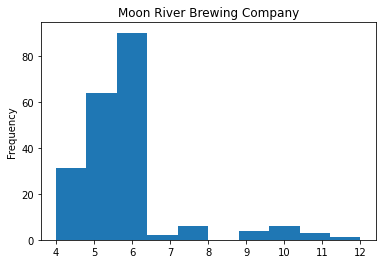

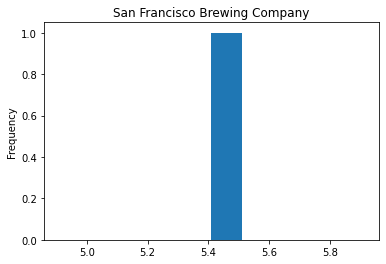

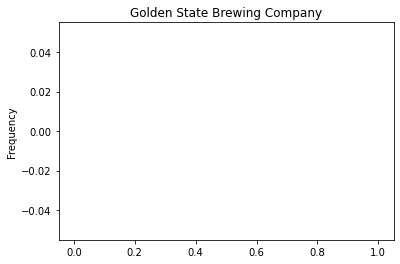

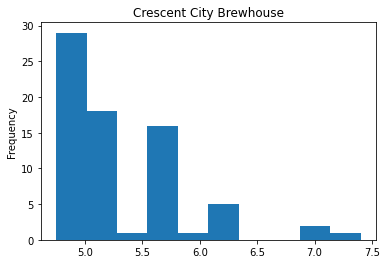

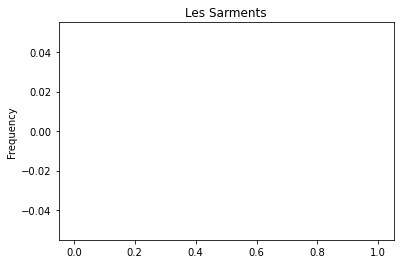

In [96]:
for brewery in BreweryNaList:
  df2.loc[df2['brewery_name'] == brewery]['abv'].plot(kind = 'hist', 
                                                                    title = brewery)
  plt.show()

In [97]:
for brewery in BreweryNaList:
  value = df2.loc[df2['brewery_name'] == brewery]['abv'].median()
  df2.loc[df2['brewery_name'] == brewery] = df2.loc[df2['brewery_name'] == brewery].fillna(value)

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [98]:
df2 = df2.dropna(axis=0)

In [99]:
df2[['style1', 'style2']] = df2['style'].str.split('/', expand = True)

In [100]:
df3 = pd.melt(df2, id_vars= ['brewery_id', 'score', 'username', 'text', 'style', 'abv',
       'brewery_name', 'beer_name'],
        value_vars = ['style1', 'style2'],
        value_name='Style'   
)

In [101]:
df3 = df3.drop(['brewery_id', 'text', 'style', 'variable'], axis = 1)

In [102]:
df3.shape

(5688, 6)

In [103]:
df3['Style'] = df3['Style'].str.strip()

In [104]:
df3 = df3.replace(to_replace='None', value=np.nan).dropna(axis = 0)

In [105]:
df3.shape

(3313, 6)

#Matrix factorization for recommendation system

In [106]:
df3['Brand_variety'] = df3[['brewery_name', 'beer_name']].apply(lambda x: '_'.join(x), axis=1)
df3.head()

,score,username,abv,brewery_name,beer_name,Style,Brand_variety
0,1.5,stcules,5.0,Vecchio Birraio,Sausa Weizen,Hefeweizen,Vecchio Birraio_Sausa Weizen
1,3.0,stcules,6.2,Vecchio Birraio,Red Moon,English Strong Ale,Vecchio Birraio_Red Moon
2,3.0,stcules,6.5,Vecchio Birraio,Black Horse Black Beer,Foreign,Vecchio Birraio_Black Horse Black Beer
3,3.0,stcules,5.0,Vecchio Birraio,Sausa Pils,German Pilsener,Vecchio Birraio_Sausa Pils
4,4.0,johnmichaelsen,7.7,Caldera Brewing Company,Cauldron DIPA,American Double,Caldera Brewing Company_Cauldron DIPA


### Create non-negative data matrix

In [107]:
cmat = pd.crosstab(df3['username'],df3['Brand_variety'],values = df3['score'],aggfunc='mean')
cmat

Brand_variety,4th Street Brewing Company_SueBee Honey Ale,7 Seas Brewery and Taproom_Ballz Deep Double IPA,7 Seas Brewery and Taproom_Barrel Aged Port Royal Stout W/ Vanilla Beans,7 Seas Brewery and Taproom_British Pale Ale,7 Seas Brewery and Taproom_Cascadian Dark Ale,7 Seas Brewery and Taproom_Cutt's Ale,7 Seas Brewery and Taproom_Hop Prophet,7 Seas Brewery and Taproom_Port Royal Stout,7 Seas Brewery and Taproom_Rude Parrot,7 Seas Brewery and Taproom_Saison Du Sept Mers,...,Yeastie Boys_Her Majesty 2010,Yeastie Boys_Her Majesty 2011,Yeastie Boys_Hud-a-wa' Strong,Yeastie Boys_Motueka Monster,Yeastie Boys_Nerdherder D,Yeastie Boys_Pot Kettle Black,Yeastie Boys_Red Rackham,Yeastie Boys_Return To Magenta,Yeastie Boys_Rex Attitude,Yeastie Boys_Yakima Monster
username,,,,,,,,,,,,,,,,,,,,,
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fastz28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31thadrty1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4000qtrap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67cuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeledonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zerk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zoolzoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
cmat = cmat.fillna(0)
cmat

Brand_variety,4th Street Brewing Company_SueBee Honey Ale,7 Seas Brewery and Taproom_Ballz Deep Double IPA,7 Seas Brewery and Taproom_Barrel Aged Port Royal Stout W/ Vanilla Beans,7 Seas Brewery and Taproom_British Pale Ale,7 Seas Brewery and Taproom_Cascadian Dark Ale,7 Seas Brewery and Taproom_Cutt's Ale,7 Seas Brewery and Taproom_Hop Prophet,7 Seas Brewery and Taproom_Port Royal Stout,7 Seas Brewery and Taproom_Rude Parrot,7 Seas Brewery and Taproom_Saison Du Sept Mers,...,Yeastie Boys_Her Majesty 2010,Yeastie Boys_Her Majesty 2011,Yeastie Boys_Hud-a-wa' Strong,Yeastie Boys_Motueka Monster,Yeastie Boys_Nerdherder D,Yeastie Boys_Pot Kettle Black,Yeastie Boys_Red Rackham,Yeastie Boys_Return To Magenta,Yeastie Boys_Rex Attitude,Yeastie Boys_Yakima Monster
username,,,,,,,,,,,,,,,,,,,,,
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31thadrty1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4000qtrap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67cuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeledonia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zerk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zoolzoo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
User = df3['username'].unique()

In [110]:
num_name_user = list(range(len(User)))
cmat.index = num_name_user
cmat

Brand_variety,4th Street Brewing Company_SueBee Honey Ale,7 Seas Brewery and Taproom_Ballz Deep Double IPA,7 Seas Brewery and Taproom_Barrel Aged Port Royal Stout W/ Vanilla Beans,7 Seas Brewery and Taproom_British Pale Ale,7 Seas Brewery and Taproom_Cascadian Dark Ale,7 Seas Brewery and Taproom_Cutt's Ale,7 Seas Brewery and Taproom_Hop Prophet,7 Seas Brewery and Taproom_Port Royal Stout,7 Seas Brewery and Taproom_Rude Parrot,7 Seas Brewery and Taproom_Saison Du Sept Mers,...,Yeastie Boys_Her Majesty 2010,Yeastie Boys_Her Majesty 2011,Yeastie Boys_Hud-a-wa' Strong,Yeastie Boys_Motueka Monster,Yeastie Boys_Nerdherder D,Yeastie Boys_Pot Kettle Black,Yeastie Boys_Red Rackham,Yeastie Boys_Return To Magenta,Yeastie Boys_Rex Attitude,Yeastie Boys_Yakima Monster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Create an NMF instance

In [111]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=30)
nmf.fit(cmat)

NMF(n_components=30)

In [112]:
nmf.components_.shape

(30, 450)

In [113]:
H = pd.DataFrame(np.round(nmf.components_,2), columns=cmat.columns)
H

Brand_variety,4th Street Brewing Company_SueBee Honey Ale,7 Seas Brewery and Taproom_Ballz Deep Double IPA,7 Seas Brewery and Taproom_Barrel Aged Port Royal Stout W/ Vanilla Beans,7 Seas Brewery and Taproom_British Pale Ale,7 Seas Brewery and Taproom_Cascadian Dark Ale,7 Seas Brewery and Taproom_Cutt's Ale,7 Seas Brewery and Taproom_Hop Prophet,7 Seas Brewery and Taproom_Port Royal Stout,7 Seas Brewery and Taproom_Rude Parrot,7 Seas Brewery and Taproom_Saison Du Sept Mers,...,Yeastie Boys_Her Majesty 2010,Yeastie Boys_Her Majesty 2011,Yeastie Boys_Hud-a-wa' Strong,Yeastie Boys_Motueka Monster,Yeastie Boys_Nerdherder D,Yeastie Boys_Pot Kettle Black,Yeastie Boys_Red Rackham,Yeastie Boys_Return To Magenta,Yeastie Boys_Rex Attitude,Yeastie Boys_Yakima Monster
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.02,0.15,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.08,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.05,0.00,0.18,0.00,0.00,0.00,0.18,0.21,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [114]:
W = pd.DataFrame(np.round(nmf.transform(cmat),2), columns=H.index)
W

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.00,0.00,0.00,0.0,0.38,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
1,0.00,0.00,0.00,0.0,0.00,0.04,0.00,0.00,0.00,0.00,...,0.08,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
2,0.00,0.38,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
3,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.01,0.00,...,0.00,0.0,0.0,0.51,0.0,0.02,0.0,0.0,0.0,0.0
4,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,0.00,0.00,0.00,0.0,0.00,0.00,0.53,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
1418,0.00,0.00,0.00,0.0,0.00,0.03,0.00,0.00,0.00,0.00,...,2.35,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
1419,0.38,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
1420,0.43,0.00,0.01,0.0,0.00,0.00,0.00,0.51,0.00,0.26,...,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0


In [115]:
cmat

Brand_variety,4th Street Brewing Company_SueBee Honey Ale,7 Seas Brewery and Taproom_Ballz Deep Double IPA,7 Seas Brewery and Taproom_Barrel Aged Port Royal Stout W/ Vanilla Beans,7 Seas Brewery and Taproom_British Pale Ale,7 Seas Brewery and Taproom_Cascadian Dark Ale,7 Seas Brewery and Taproom_Cutt's Ale,7 Seas Brewery and Taproom_Hop Prophet,7 Seas Brewery and Taproom_Port Royal Stout,7 Seas Brewery and Taproom_Rude Parrot,7 Seas Brewery and Taproom_Saison Du Sept Mers,...,Yeastie Boys_Her Majesty 2010,Yeastie Boys_Her Majesty 2011,Yeastie Boys_Hud-a-wa' Strong,Yeastie Boys_Motueka Monster,Yeastie Boys_Nerdherder D,Yeastie Boys_Pot Kettle Black,Yeastie Boys_Red Rackham,Yeastie Boys_Return To Magenta,Yeastie Boys_Rex Attitude,Yeastie Boys_Yakima Monster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Reconstruct data matrix from matrix W and H

In [116]:
reconstructed = pd.DataFrame(np.round(np.dot(W,H),2), columns=cmat.columns)
reconstructed.index = cmat.index
reconstructed

Brand_variety,4th Street Brewing Company_SueBee Honey Ale,7 Seas Brewery and Taproom_Ballz Deep Double IPA,7 Seas Brewery and Taproom_Barrel Aged Port Royal Stout W/ Vanilla Beans,7 Seas Brewery and Taproom_British Pale Ale,7 Seas Brewery and Taproom_Cascadian Dark Ale,7 Seas Brewery and Taproom_Cutt's Ale,7 Seas Brewery and Taproom_Hop Prophet,7 Seas Brewery and Taproom_Port Royal Stout,7 Seas Brewery and Taproom_Rude Parrot,7 Seas Brewery and Taproom_Saison Du Sept Mers,...,Yeastie Boys_Her Majesty 2010,Yeastie Boys_Her Majesty 2011,Yeastie Boys_Hud-a-wa' Strong,Yeastie Boys_Motueka Monster,Yeastie Boys_Nerdherder D,Yeastie Boys_Pot Kettle Black,Yeastie Boys_Red Rackham,Yeastie Boys_Return To Magenta,Yeastie Boys_Rex Attitude,Yeastie Boys_Yakima Monster
0,0.03,0.00,0.00,0.00,0.00,0.0,0.00,0.02,0.03,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.01,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.81,0.42,0.50,0.37,0.0,0.28,0.03,0.46,0.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.03,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,0.03,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1418,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1419,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1420,0.00,0.20,0.00,0.05,0.00,0.0,0.00,0.11,0.12,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Recommendation system

In [117]:
def recomendation(uid,topk=5):
  res = reconstructed.T[uid].sort_values(ascending=False)[0:topk]
  res = list(res[res>0].index)
  res = df3[df3['Brand_variety'].isin(res)]
  res = res.drop_duplicates(subset='Brand_variety')
  res = res[:topk]
  res = res[['Brand_variety','Style','abv']]
  return res

In [118]:
user = 1

In [119]:
res = recomendation(user,topk=10)
res

,Brand_variety,Style,abv
1593,Broad Ripple Brew Pub_Oktoberfest,Märzen,5.5
1618,Broad Ripple Brew Pub_I.P.A.,American IPA,6.2
1640,Broad Ripple Brew Pub_Red Bird Mild,English Dark Mild Ale,5.6
1652,Broad Ripple Brew Pub_Hopcicle Double IPA,American Double,9.0
1665,Broad Ripple Brew Pub_E.S.B.,Extra Special,5.6
1672,Broad Ripple Brew Pub_T.J.'s Best Bitter,English Bitter,5.3
1691,Broad Ripple Brew Pub_Broad Ripple Lawnmower P...,American Pale Ale (APA),5.0
1701,Broad Ripple Brew Pub_Black Heart Lager,Euro Dark Lager,5.9
1706,Broad Ripple Brew Pub_Wee Alec Heavy,Scotch Ale,7.7
1723,Broad Ripple Brew Pub_Wobbly Bob APA,American Pale Ale (APA),5.5
